In [1]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt
from diffusers import StableDiffusionGLIGENPipeline
import matplotlib

/home/ffundel/Seminar/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ffundel/Seminar/diffusers/src/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


In [2]:
pipe = StableDiffusionGLIGENPipeline.from_pretrained("gligen/diffusers-generation-text-box", revision="fp16", torch_dtype=torch.float16)
pipe.to("cuda")

text_encoder/model.safetensors not found
/home/ffundel/Seminar/diffusers/src/diffusers/models/cross_attention.py:44: FutureWarning: CrossAttention is deprecated and will be removed in `0.18.0`. Please use `from diffusers.models.attention_processor import Attention instead.
  deprecate("cross_attention", "0.18.0", deprecation_message, standard_warn=False)
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/home/ffundel/Seminar/env/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionGLIGENPipeline {
  "_class_name": "StableDiffusionGLIGENPipeline",
  "_diffusers_version": "0.15.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [3]:
import json

with open('data.json') as f:
    data = json.load(f)

json_index = 0
rects, labels = data[json_index]
if '__image__' in labels:
    i = labels.index('__image__')
    del labels[i]
    del rects[i]
print(labels)

['bus', 'sky-other', 'tree', 'road']


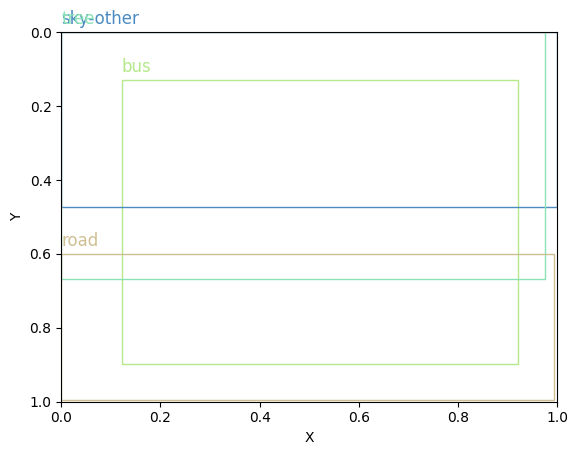

In [4]:
import matplotlib.patches as patches
import random

# Plot the rectangles
fig, ax = plt.subplots()
for box, lbl in zip(rects, labels):
    color = (random.random(), random.random(), random.random())
    rect = patches.Rectangle((box[0], box[1]), box[2], box[3],
                             linewidth=1, edgecolor=color,
                             facecolor='none')
    ax.text(box[0], box[1]-0.06, lbl, fontsize=12, va='top', color=color)
    ax.add_patch(rect)

# Set plot limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Flip the plot upside down
ax.invert_yaxis()

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()

In [ ]:
prompt = "a photo of " + ', '.join(labels)
images = pipe(
    prompt,
    num_images_per_prompt=3,
    gligen_phrases = labels,
    gligen_boxes = rects,
    gligen_scheduled_sampling_beta=0.3,
    output_type="numpy",
    num_inference_steps=50
).images

In [ ]:
for i, img in enumerate(images):
    img_path = os.path.join('gligen_images', 'img' + str(json_index) + '_' + str(i) + '.png')
    matplotlib.image.imsave(img_path, img)

In [ ]:
plt.axis('off')
plt.imshow(images[0])

In [ ]:
plt.axis('off')
plt.imshow(images[1])

In [ ]:
plt.axis('off')
plt.imshow(images[2])

[[[[0.12183372676372528, 0.13036595284938812, 0.798812210559845, 0.7672157287597656], [0.0, 0.0, 0.9987456798553467, 0.47190117835998535], [0.0, 0.0, 0.9759652614593506, 0.6691247224807739], [0.0, 0.5996671319007874, 0.9927868843078613, 0.39639073610305786], [0.0, 0.0, 0.9977089166641235, 0.9949874877929688]], ['bus', 'sky-other', 'tree', 'road', '__image__']], [[[0.2622836232185364, 0.3226991295814514, 0.2766537070274353, 0.6286270022392273], [0.14635297656059265, 0.35929587483406067, 0.3019172251224518, 0.6147009134292603], [0.2866394817829132, 0.18289875984191895, 0.3224250376224518, 0.4257042407989502], [0.0, 0.6212916374206543, 0.9934386014938354, 0.3774453401565552], [0.053409963846206665, 0.20340058207511902, 0.20861589908599854, 0.6496915817260742], [0.0, 0.0, 0.9844348430633545, 0.23599927127361298], [0.06855591386556625, 0.3132950961589813, 0.9058975577354431, 0.3618915379047394], [0.0, 0.018210262060165405, 0.9986417293548584, 0.5405324697494507], [0.0, 0.0, 0.99849927425384

100%|███████████████████████████████████████████| 50/50 [06:17<00:00,  7.56s/it]


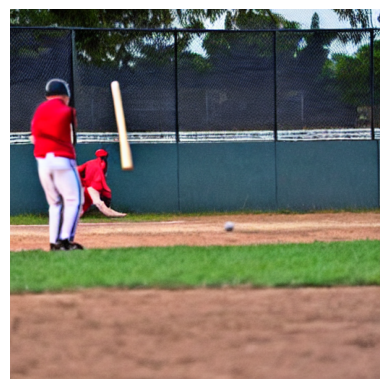

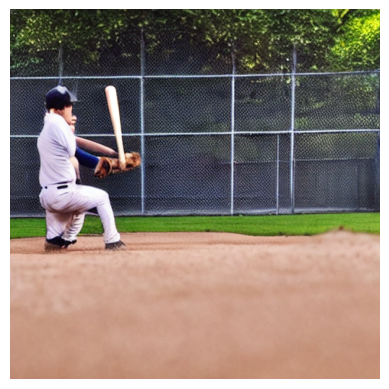

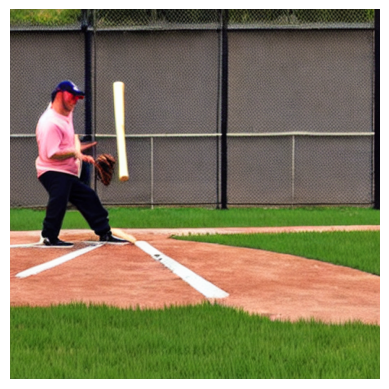

['gravel', 'railroad', 'train', 'sky-other', 'tree', 'dirt']


100%|███████████████████████████████████████████| 50/50 [06:19<00:00,  7.59s/it]


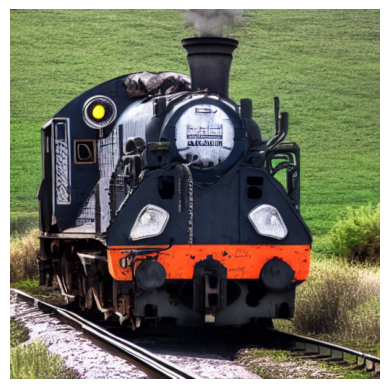

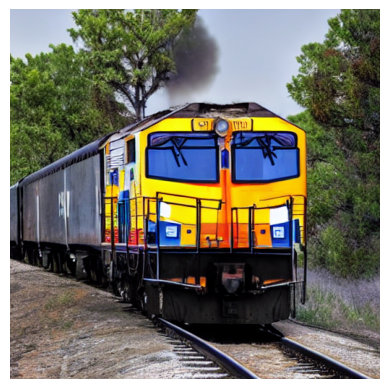

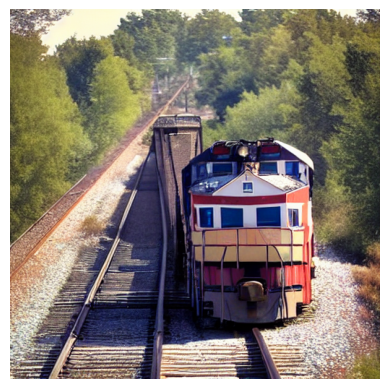

['boat', 'rock', 'mountain', 'sky-other', 'sea']


100%|███████████████████████████████████████████| 50/50 [06:18<00:00,  7.57s/it]


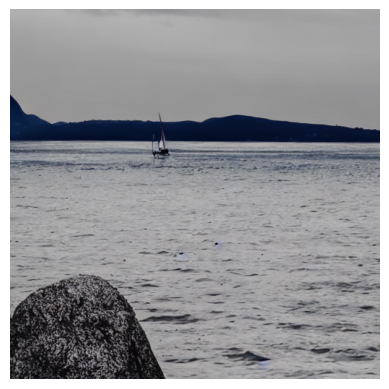

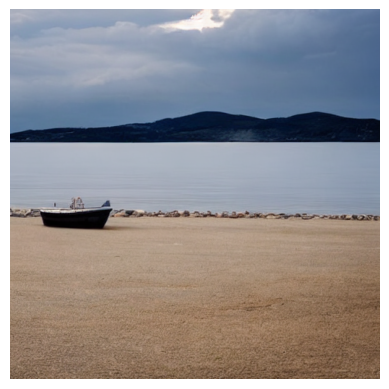

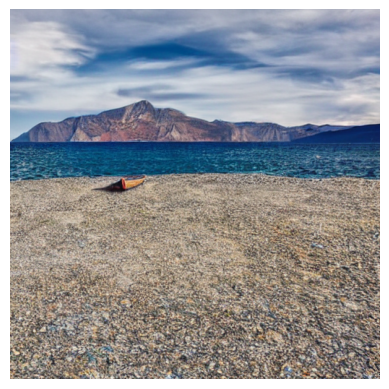

['skyscraper', 'sea', 'clouds', 'bridge', 'building-other', 'boat', 'boat']


100%|███████████████████████████████████████████| 50/50 [06:18<00:00,  7.57s/it]


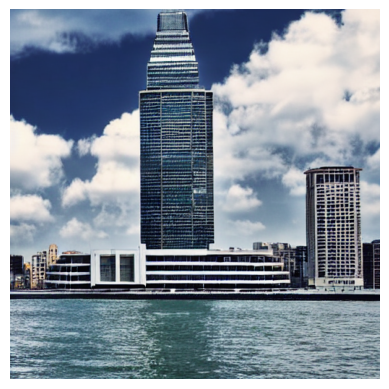

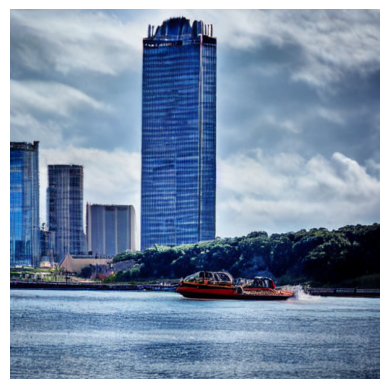

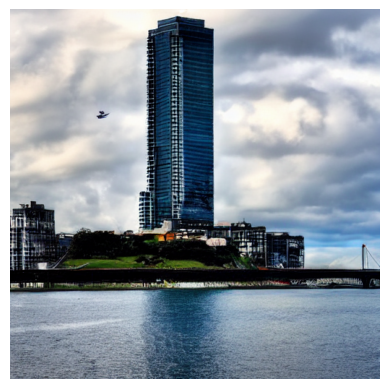

['horse', 'tree', 'horse', 'grass', 'horse', 'sky-other']


100%|███████████████████████████████████████████| 50/50 [06:18<00:00,  7.58s/it]


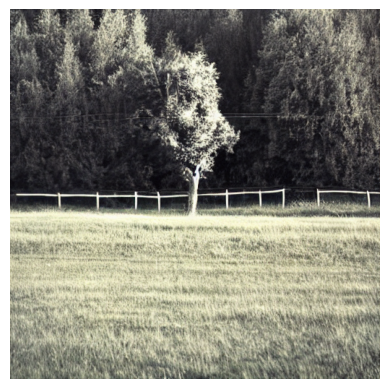

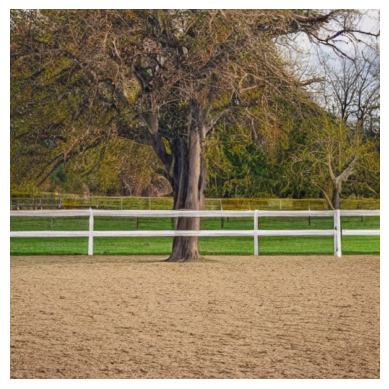

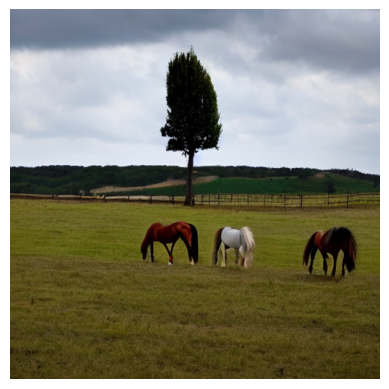

['car', 'building-other', 'tent', 'window-other', 'pavement', 'fog', 'road']


100%|███████████████████████████████████████████| 50/50 [06:18<00:00,  7.57s/it]


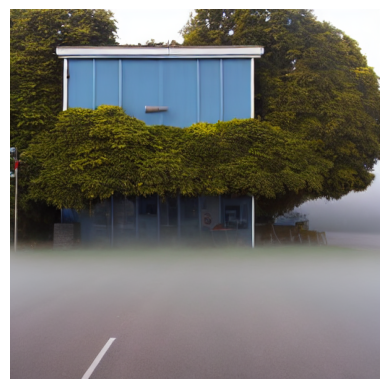

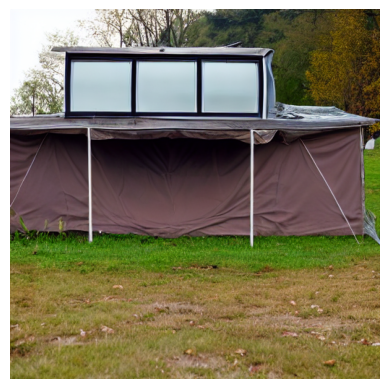

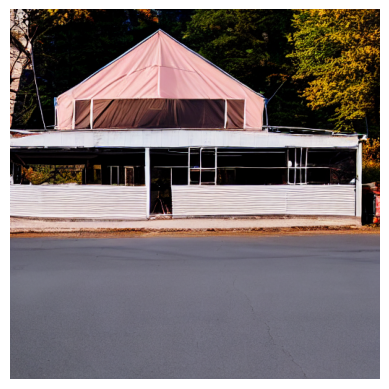

['elephant', 'grass', 'bush', 'tree']


100%|███████████████████████████████████████████| 50/50 [06:18<00:00,  7.58s/it]


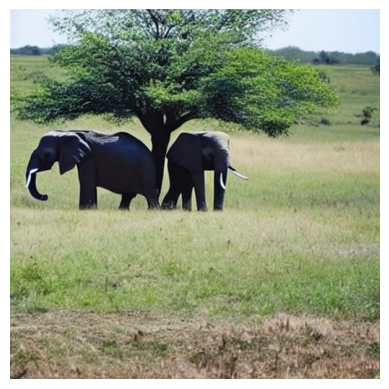

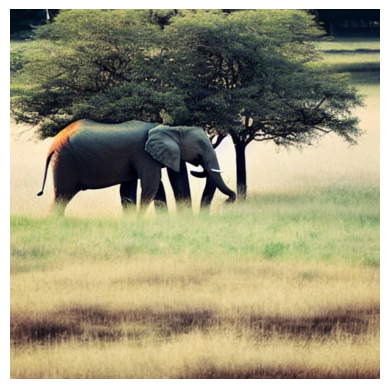

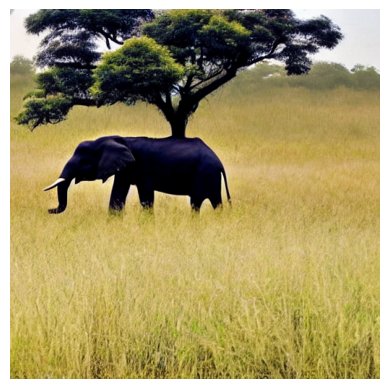

['snow', 'tree', 'branch', 'person']


100%|███████████████████████████████████████████| 50/50 [06:18<00:00,  7.58s/it]


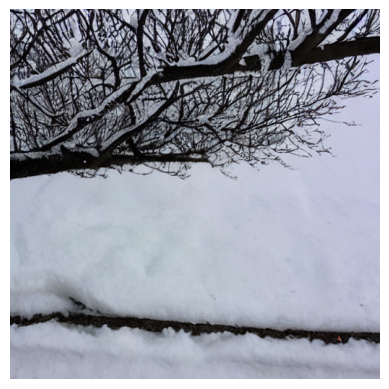

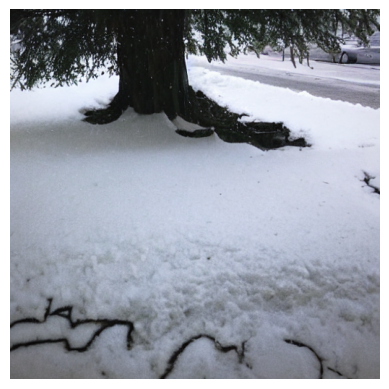

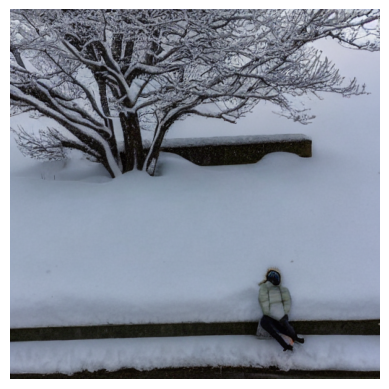

['pavement', 'car', 'building-other', 'road', 'wall-concrete', 'sky-other', 'metal']


100%|███████████████████████████████████████████| 50/50 [06:19<00:00,  7.58s/it]


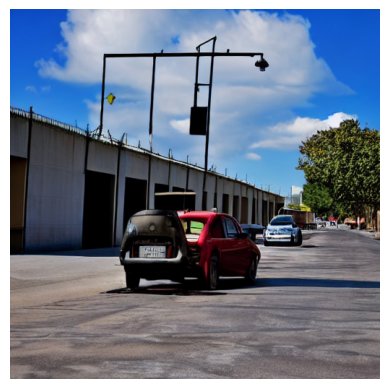

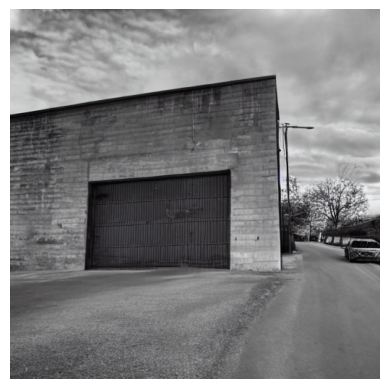

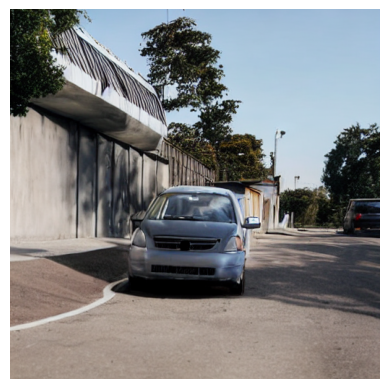

In [7]:
####

with open('data.json') as f:
    data = json.load(f)
print(data)

for json_index in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    rects, labels = data[json_index]
    if '__image__' in labels:
        i = labels.index('__image__')
        del labels[i]
        del rects[i]
    print(labels)
    
    prompt = "a photo of " + ', '.join(labels)
    images = pipe(
        prompt,
        num_images_per_prompt=3,
        gligen_phrases = labels,
        gligen_boxes = rects,
        gligen_scheduled_sampling_beta=0.3,
        output_type="numpy",
        num_inference_steps=50
    ).images
    
    for i, img in enumerate(images):
        img_path = os.path.join('gligen_images', 'img' + str(json_index) + '_' + str(i) + '.png')
        matplotlib.image.imsave(img_path, img)
        plt.axis('off')
        plt.imshow(img)
        plt.show()

In [ ]:
# Calculate IS and FID

# load images
# IS
# FID